# Adult Income

### Project Overview

The Adult dataset is from the Census Bureau, and the task is to predict whether a given adult
earns more than $50,000 per year based on attributes like education, hours worked per week,
and so on.

### Problem Statement

The data includes anonymous information such as age, occupation, education, working class, and
so on. The goal is to train a binary classifier to predict income, which has two possible values:
">50K" and "50K." The dataset contains 48842 instances and 14 attributes. The information is a
good mix of categorical, numerical, and missing values. <br> <br>

In [164]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [165]:
col_names = ['age', 'work_class', 'final_weight', 'education', 'education_numb_of_years', 'marital_status', 'occupation', 
           'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
adult_income = pd.read_csv('adult_data_training.csv', header=None, delimiter = ", ", names = col_names, na_values=["?"])
adult_test = pd.read_csv('adult_data_test.csv', header=None, delimiter = ", ", names = col_names, na_values=["?"], skiprows=1)
adult_income.head(16)

,age,work_class,final_weight,education,education_numb_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Description of the Dataset
This data was extracted from the census bureau database. It can be found at: <br>
| https://archive.ics.uci.edu/ml/datasets/census+income <br>
| Donor: Ronny Kohavi and Barry Becker, <br>
|        Data Mining and Visualization <br>
|        Silicon Graphics. <br>
|        e-mail: ronnyk@sgi.com for questions. <br>

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))


### Continuous Attributes (6)
The following are the continuous attributes in the dataset:

<b>1. age:</b> Age of an individual <br>
<b>2. education_numb_of_years:</b> Individual's year of receiving education <br>
<b>3. final_weight:</b> The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. <br>
<b>4. capital_gain</b> <br>
<b>5. capital_loss</b> <br>
<b>6. hours_per_week:</b> Individual's working hour per week


### Categorical Attributes (8)
The following are the categorical attributes in the dataset: 

<b>1. work_class:</b> Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. <br>
<b>2. education:</b> Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. <br>
<b>3. marital_status:</b> Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. <br>
<b>4. occupation: </b> Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. <br>
<b>5. relationship</b> Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. <br>
<b>6. race:</b> White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. <br>
<b>7. sex:</b> Female, Male. <br>
<b>8. native_country:</b> United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, 
Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. <br> <br>

In this dataset, our outcome variable will be the <b>income</b> column

Information on this dataset can be seen below


In [166]:
print(adult_income['income'].value_counts())


<=50K    24720
>50K      7841
Name: income, dtype: int64


In [167]:
adult_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      32561 non-null  int64 
 1   work_class               30725 non-null  object
 2   final_weight             32561 non-null  int64 
 3   education                32561 non-null  object
 4   education_numb_of_years  32561 non-null  int64 
 5   marital_status           32561 non-null  object
 6   occupation               30718 non-null  object
 7   relationship             32561 non-null  object
 8   race                     32561 non-null  object
 9   sex                      32561 non-null  object
 10  capital_gain             32561 non-null  int64 
 11  capital_loss             32561 non-null  int64 
 12  hours_per_week           32561 non-null  int64 
 13  native_country           31978 non-null  object
 14  income                   32561 non-nul

In [168]:
count_null = adult_income.isnull().sum() #Checking the total number of null values in the dataset per attribute(column)
count_null

age                           0
work_class                 1836
final_weight                  0
education                     0
education_numb_of_years       0
marital_status                0
occupation                 1843
relationship                  0
race                          0
sex                           0
capital_gain                  0
capital_loss                  0
hours_per_week                0
native_country              583
income                        0
dtype: int64

After checking the total number of null values in the various datasets, <b>work_class, occupation and native_country</b> are the attributes which contain null values.

In [169]:
total_cells = np.product(adult_income.shape)
total_missing = count_null.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.8726185723206699


In [170]:
print(adult_income.work_class.unique())
print(adult_income.occupation.unique())
print(adult_income.native_country.unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


In [171]:
categorical_cols = ['work_class', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

for col in categorical_cols:
    print(col, ' has ', len(adult_income[col].unique()), ' unique categories.') #note that the output includes the nulls as unique categories

work_class  has  9  unique categories.
education  has  16  unique categories.
marital_status  has  7  unique categories.
occupation  has  15  unique categories.
relationship  has  6  unique categories.
race  has  5  unique categories.
sex  has  2  unique categories.
native_country  has  42  unique categories.


In [172]:
adult_income.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
final_weight,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_numb_of_years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [173]:
col_mode = dict(adult_income.mode().iloc[0])
adult_income = adult_income.fillna(col_mode)
print(col_mode)

{'age': 36.0, 'work_class': 'Private', 'final_weight': 123011, 'education': 'HS-grad', 'education_numb_of_years': 9.0, 'marital_status': 'Married-civ-spouse', 'occupation': 'Prof-specialty', 'relationship': 'Husband', 'race': 'White', 'sex': 'Male', 'capital_gain': 0.0, 'capital_loss': 0.0, 'hours_per_week': 40.0, 'native_country': 'United-States', 'income': '<=50K'}


In [174]:
test_col_mode = dict(adult_test.mode().iloc[0])
adult_test = adult_test.fillna(col_mode)
adult_test.isnull().sum()

age                        0
work_class                 0
final_weight               0
education                  0
education_numb_of_years    0
marital_status             0
occupation                 0
relationship               0
race                       0
sex                        0
capital_gain               0
capital_loss               0
hours_per_week             0
native_country             0
income                     0
dtype: int64

In [175]:
adult_income.isnull().sum()

age                        0
work_class                 0
final_weight               0
education                  0
education_numb_of_years    0
marital_status             0
occupation                 0
relationship               0
race                       0
sex                        0
capital_gain               0
capital_loss               0
hours_per_week             0
native_country             0
income                     0
dtype: int64

# Feature Engineering

In [176]:
# Looking at the number of unique categories for each attribute, one can see that the native country has the most categories. 
# Checking the number of observations for each of the uniques categories

print(adult_income['native_country'].value_counts().sort_values(ascending=False).head(10))

# The gap between the United States and all other citizen is very high, 
# therefore we can group all the other countries as say 'Other'.

adult_income['native_country'] = ['United-States' if i == 'United-States' else 'Other' for i in adult_income['native_country']]
print(adult_income['native_country'].value_counts().sort_values(ascending=False))

adult_test['native_country'] = ['United-States' if i == 'United-States' else 'Other' for i in adult_test['native_country']]
print(adult_test['native_country'].value_counts().sort_values(ascending=False))


United-States    29753
Mexico             643
Philippines        198
Germany            137
Canada             121
Puerto-Rico        114
El-Salvador        106
India              100
Cuba                95
England             90
Name: native_country, dtype: int64
United-States    29753
Other             2808
Name: native_country, dtype: int64
United-States    14936
Other             1345
Name: native_country, dtype: int64


In [177]:
print(adult_income['education'].value_counts().sort_values(ascending=False)) # looking at the data, one can realise that the number of adults whose educational level is below high school graduated is quite less so we can group all of them as one attribute


HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


In [178]:
adult_income['education'] = adult_income['education'].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'], 'Preschool-12th')
adult_test['education'] = adult_test['education'].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'], 'Preschool-12th')

adult_income['education'] = adult_income['education'].replace(['Assoc-voc', 'Assoc-acdm'], 'Associate')
adult_test['education'] = adult_test['education'].replace(['Assoc-voc', 'Assoc-acdm'], 'Associate')

adult_test['education'].value_counts()
   


HS-grad           5283
Some-college      3587
Bachelors         2670
Preschool-12th    2155
Associate         1213
Masters            934
Prof-school        258
Doctorate          181
Name: education, dtype: int64

In [179]:
print(adult_income['marital_status'].value_counts().sort_values(ascending=False)) # from the results, i can group all the married people as married

adult_income['marital_status'] = adult_income['marital_status'].replace(['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent'], 'Married')
adult_test['marital_status'] = adult_test['marital_status'].replace(['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent'], 'Married')

print(adult_test['marital_status'].value_counts())



Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Married          7627
Never-married    5434
Divorced         2190
Widowed           525
Separated         505
Name: marital_status, dtype: int64


In [180]:
adult_income.corr()  # correlation between the numeric data

,age,final_weight,education_numb_of_years,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
final_weight,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_numb_of_years,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<AxesSubplot:>

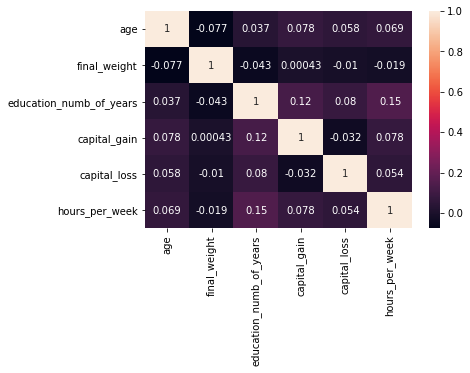

In [181]:
sns.heatmap(adult_income.corr(), annot=True) # visually checking out the relationship among the numerical data

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'final_weight'}>],
       [<AxesSubplot:title={'center':'education_numb_of_years'}>,
        <AxesSubplot:title={'center':'capital_gain'}>],
       [<AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'hours_per_week'}>]], dtype=object)

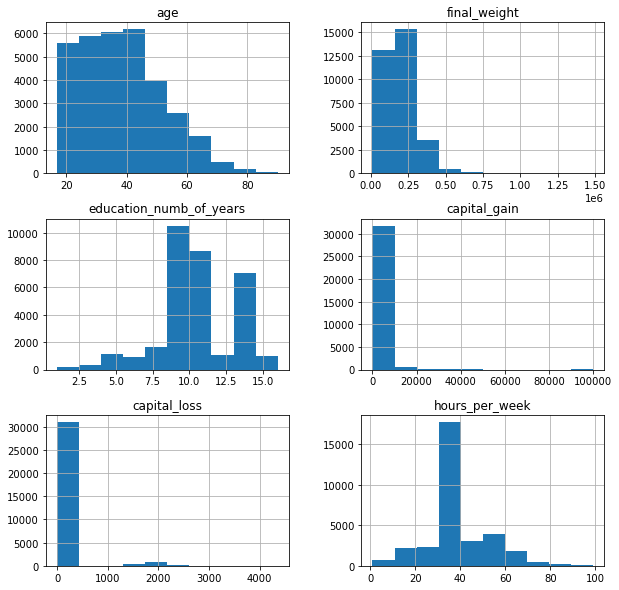

In [182]:
adult_income.hist(figsize=(10,10))

## Model Building

In [221]:
X_train = adult_income.drop(['income', 'education_numb_of_years', 'final_weight'], axis=1)
y_train = adult_income['income']

X_test = adult_test.drop(['income', 'education_numb_of_years', 'final_weight'], axis=1)
y_test = adult_test['income']

X_train

,age,work_class,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,6,1,2,0,1,4,1,2174,0,40,1
1,50,5,1,1,3,0,4,1,0,0,13,1
2,38,3,3,0,5,1,4,1,0,0,40,1
3,53,3,5,1,5,0,2,1,0,0,40,1
4,28,3,1,1,9,5,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,0,1,12,5,4,0,0,0,38,1
32557,40,3,3,1,6,0,4,1,0,0,40,1
32558,58,3,3,4,0,4,4,0,0,0,40,1
32559,22,3,3,2,0,3,4,1,0,0,20,1


## Feature Scaling and Encoding Categorical Data

In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn import LabelEncoder

In [217]:
categorical_features = ['work_class', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

work_class_label = preprocessing.LabelEncoder()
education_label = preprocessing.LabelEncoder()
marital_status_label = preprocessing.LabelEncoder()
occupation_label = preprocessing.LabelEncoder()
relationship_label = preprocessing.LabelEncoder()
race_label = preprocessing.LabelEncoder()
sex_label = preprocessing.LabelEncoder()
native_country_label = preprocessing.LabelEncoder()
income_label = preprocessing.LabelEncoder()

adult_income['work_class'] = work_class_label.fit_transform(adult_income['work_class'])
adult_income['education'] = education_label.fit_transform(adult_income['education'])
adult_income['marital_status'] = marital_status_label.fit_transform(adult_income['marital_status'])
adult_income['occupation'] = occupation_label.fit_transform(adult_income['occupation'])
adult_income['relationship'] = relationship_label.fit_transform(adult_income['relationship'])
adult_income['race'] = race_label.fit_transform(adult_income['race'])
adult_income['sex'] = sex_label.fit_transform(adult_income['sex'])
adult_income['native_country'] = native_country_label.fit_transform(adult_income['native_country'])
adult_income['income'] = income_label.fit_transform(adult_income['income'])


adult_test['work_class'] = work_class_label.fit_transform(adult_test['work_class'])
adult_test['education'] = education_label.fit_transform(adult_test['education'])
adult_test['marital_status'] = marital_status_label.fit_transform(adult_test['marital_status'])
adult_test['occupation'] = occupation_label.fit_transform(adult_test['occupation'])
adult_test['relationship'] = relationship_label.fit_transform(adult_test['relationship'])
adult_test['race'] = race_label.fit_transform(adult_test['race'])
adult_test['sex'] = sex_label.fit_transform(adult_test['sex'])
adult_test['native_country'] = native_country_label.fit_transform(adult_test['native_country'])
adult_test['income'] = income_label.fit_transform(adult_test['income'])

adult_test.head()


,age,work_class,final_weight,education,education_numb_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,3,226802,5,7,2,6,3,2,1,0,0,40,1,0
1,38,3,89814,3,9,1,4,0,4,1,0,0,50,1,0
2,28,1,336951,0,12,1,10,0,4,1,0,0,40,1,1
3,44,3,160323,7,10,1,6,0,2,1,7688,0,40,1,1
4,18,3,103497,7,10,2,9,3,4,0,0,0,30,1,0


In [222]:
std = StandardScaler().fit(adult_income.drop(['income', 'education_numb_of_years', 'final_weight'], axis=1))

X_train = std.transform(adult_income.drop(['income', 'education_numb_of_years', 'final_weight'], axis=1))
y_train = adult_income['income']

std = StandardScaler().fit(adult_test.drop(['income', 'education_numb_of_years', 'final_weight'], axis=1))

X_test = std.transform(adult_test.drop(['income', 'education_numb_of_years', 'final_weight'], axis=1))
y_test = adult_test['income']

## Logistic Regression

In [223]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))



0.8037589828634605


## Random Forest

In [224]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators = 100, random_state = 1)
rand_forest = rand_forest.fit(X_train, y_train)
print(rand_forest.score(X_test, y_test))


0.8446655610834716


In [220]:
def prediction_model(age, work_class, final_weight, education, education_numb_of_years, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country):
    import pickle
    x = [[age, work_class, final_weight, education, education_numb_of_years, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country]]
    rand_forest = pickle.load(open('income_model.sav', 'rb'))
    prediction = rand_forest.predict(x)
    print(prediction)
    
prediction_model(20, 1,2,3,3,5,4,2,21,3,0,1,10,0)

[0]


## Checking the ROC AUC

ROC AUC Score for Logistic Regression:  0.8129518216514747
ROC AUC Score for Random Forest:  0.8890946389765523


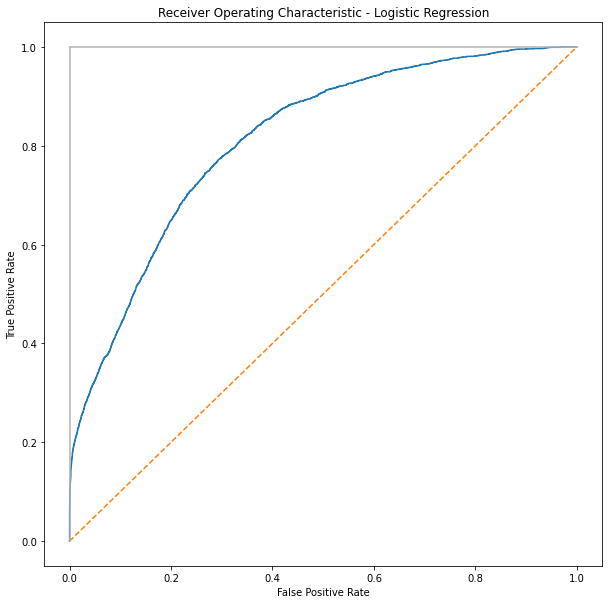

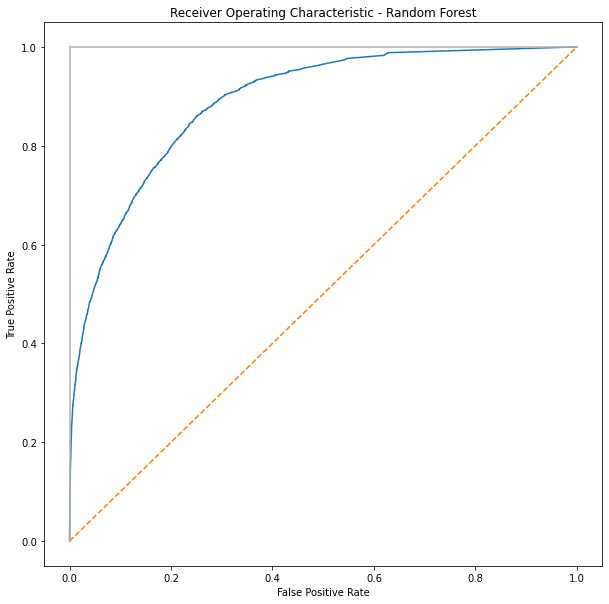

In [225]:
y_score1 = logreg.predict_proba(X_test)[:,1]
y_score2 = rand_forest.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

print('ROC AUC Score for Logistic Regression: ', roc_auc_score(y_test, y_score1))
print('ROC AUC Score for Random Forest: ', roc_auc_score(y_test, y_score2))


plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Looking at the ROC AUC score of both models, Random Forest is more higher.
### In conclusion, the model I choose for predicting the Adult Income is Random Forest Classifier.

## Models and Labels Saving

In [219]:
import pickle

pickle.dump(rand_forest, open('income_model.sav', 'wb')) # saving the model

pickle.dump(std, open('scaling.pkl', 'wb'))

# saving label encoders
pickle.dump(work_class_label, open('work_class_label.pkl', 'wb'))
pickle.dump(education_label, open('education_label.pkl', 'wb'))
pickle.dump(marital_status_label, open('marital_status_label.pkl', 'wb'))
pickle.dump(occupation_label, open('occupation_label.pkl', 'wb'))
pickle.dump(relationship_label, open('relationship_label.pkl', 'wb'))
pickle.dump(race_label, open('race_label.pkl', 'wb'))
pickle.dump(sex_label, open('sex_label.pkl', 'wb'))
pickle.dump(native_country_label, open('native_country_label.pkl', 'wb'))

wclass = pickle.load(open('work_class_label.pkl', 'rb'))
edu = pickle.load(open('education_label.pkl', 'rb'))
marital = pickle.load(open('marital_status_label.pkl', 'rb'))
occup = pickle.load(open('occupation_label.pkl', 'rb'))
relation = pickle.load(open('relationship_label.pkl', 'rb'))
rc = pickle.load(open('race_label.pkl', 'rb'))
sx = pickle.load(open('sex_label.pkl', 'rb'))
native = pickle.load(open('native_country_label.pkl', 'rb'))



ValueError: y contains previously unseen labels: 'Male'